In [12]:
import pandas as pd
import numpy as np
import altair as alt

In [79]:
df = pd.read_csv('../data/snp.csv')

In [80]:
population = pd.read_csv('../data/population.csv', header=None)
population = population.rename(columns={0: 'population'})

gender = pd.read_csv('../data/gender.csv', header=None)
gender = gender.rename(columns={0: 'gender'})

In [81]:
df = df.join(population)

In [40]:
df.head()

,Name,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,r39099,r39100,r39101,r39102,r39103,r39104,r39105,r39106,r39107,population
0,P11980,0,0,0,0,0,0,0,0,0,...,1,2,0,1,2,2,2,2,0,EthP
1,P638,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,1,2,EthP
2,P5939,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,2,2,1,EthP
3,P6402,0,0,0,0,0,0,0,0,0,...,1,1,0,2,1,1,2,1,2,EthP
4,P3888,0,0,0,0,0,0,0,0,0,...,2,1,1,2,2,2,1,0,1,EthP


In [91]:
col = df.columns[-11]
a = df.groupby(['population'])[col].value_counts()
a = a.rename('count').reset_index()
a = a.rename(columns={col: 'allele', 'count': col})
a

,population,allele,r39098
0,EthA,1,54
1,EthA,2,54
2,EthA,0,17
3,EthE,1,72
4,EthE,2,29
5,EthE,0,24
6,EthK,0,67
7,EthK,1,50
8,EthK,2,8
9,EthP,1,66


In [92]:
len(df.columns[-10:-1])

9

In [93]:
for col in df.columns[-10:-1]:
    b = df.groupby(['population'])[col].value_counts()
    b = b.rename('count').reset_index()
    b = b.rename(columns={col: 'allele', 'count': col})
    a = a.merge(b, on=['population', 'allele'], how='left')

In [94]:
a

,population,allele,r39098,r39099,r39100,r39101,r39102,r39103,r39104,r39105,r39106,r39107
0,EthA,1,54,45,62,13.0,52,24,62,42,58,60
1,EthA,2,54,17,23,112.0,29,98,15,5,15,16
2,EthA,0,17,63,40,NaN,44,3,48,78,52,49
3,EthE,1,72,72,70,41.0,54,48,61,48,71,56
4,EthE,2,29,32,27,5.0,57,11,45,71,17,33
5,EthE,0,24,21,28,79.0,14,66,19,6,37,36
6,EthK,0,67,28,31,22.0,54,61,30,59,15,34
7,EthK,1,50,63,66,72.0,59,53,66,55,55,59
8,EthK,2,8,34,28,31.0,12,11,29,11,55,32
9,EthP,1,66,67,64,53.0,76,68,61,55,65,52


In [98]:
a = a.fillna(0)
a

,population,allele,r39098,r39099,r39100,r39101,r39102,r39103,r39104,r39105,r39106,r39107
0,EthA,1,54,45,62,13.0,52,24,62,42,58,60
1,EthA,2,54,17,23,112.0,29,98,15,5,15,16
2,EthA,0,17,63,40,0.0,44,3,48,78,52,49
3,EthE,1,72,72,70,41.0,54,48,61,48,71,56
4,EthE,2,29,32,27,5.0,57,11,45,71,17,33
5,EthE,0,24,21,28,79.0,14,66,19,6,37,36
6,EthK,0,67,28,31,22.0,54,61,30,59,15,34
7,EthK,1,50,63,66,72.0,59,53,66,55,55,59
8,EthK,2,8,34,28,31.0,12,11,29,11,55,32
9,EthP,1,66,67,64,53.0,76,68,61,55,65,52


In [99]:
final = pd.melt(a, id_vars=['population', 'allele'], var_name='snp')
final.head()

,population,allele,snp,value
0,EthA,1,r39098,54.0
1,EthA,2,r39098,54.0
2,EthA,0,r39098,17.0
3,EthE,1,r39098,72.0
4,EthE,2,r39098,29.0


In [100]:
translate_allele = {0: 'AA', 1: 'AB', 2: 'BB'}
final.allele = final.allele.apply(lambda t: translate_allele[t])

In [101]:
final.head()

,population,allele,snp,value
0,EthA,AB,r39098,54.0
1,EthA,BB,r39098,54.0
2,EthA,AA,r39098,17.0
3,EthE,AB,r39098,72.0
4,EthE,BB,r39098,29.0


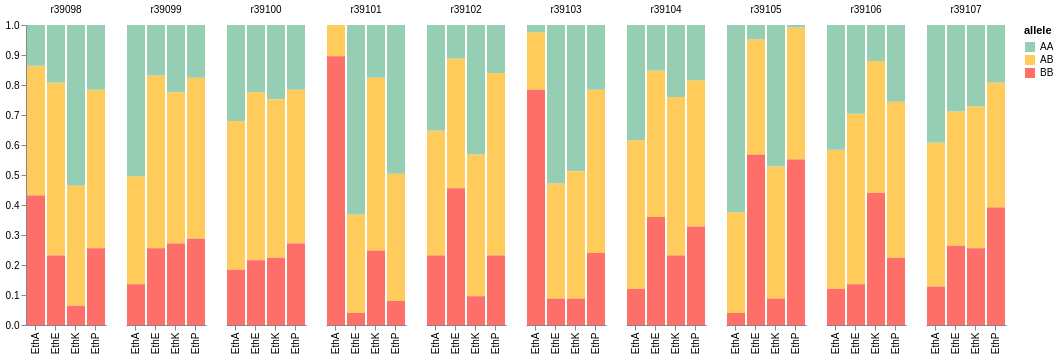

In [102]:
alt.Chart(final).mark_bar().encode(
    x=alt.X('population:N', title=None),
    y=alt.Y('value:Q', axis=alt.Axis(grid=False, title=None), stack='normalize'),
    column=alt.Column('snp:N', title=None, sort=list(df.columns[1:11])),
    color=alt.Color('allele:N', scale=alt.Scale(range=['#96ceb4', '#ffcc5c','#ff6f69']))
).configure_view(
    strokeOpacity=0
)

***

In [103]:
df.population[:10]

0    EthA
1    EthA
2    EthA
3    EthA
4    EthA
5    EthA
6    EthA
7    EthA
8    EthA
9    EthA
Name: population, dtype: object

In [76]:
df.iloc[:10, np.r_[0, -11:-1]]

,Name,r39098,r39099,r39100,r39101,r39102,r39103,r39104,r39105,r39106,r39107
0,P11980,1,1,2,0,1,2,2,2,2,0
1,P638,1,2,1,1,0,1,1,2,1,2
2,P5939,1,0,1,0,0,1,0,2,2,1
3,P6402,1,1,1,0,2,1,1,2,1,2
4,P3888,1,2,1,1,2,2,2,1,0,1
5,P14763,2,2,0,0,2,1,0,2,0,2
6,P7542,1,1,1,1,1,0,1,2,2,2
7,P8125,2,1,0,1,1,2,2,1,0,2
8,P6218,0,1,1,1,0,0,2,2,0,1
9,P671,0,0,1,1,2,1,1,2,1,1


In [77]:
df.columns

Index(['Name', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8',
       ...
       'r39099', 'r39100', 'r39101', 'r39102', 'r39103', 'r39104', 'r39105',
       'r39106', 'r39107', 'population'],
      dtype='object', length=39110)

In [82]:
df.iloc[:10, np.r_[-11:0]].to_latex(index=False)

'\\begin{tabular}{rrrrrrrrrrl}\n\\toprule\n r39098 &  r39099 &  r39100 &  r39101 &  r39102 &  r39103 &  r39104 &  r39105 &  r39106 &  r39107 & population \\\\\n\\midrule\n      2 &       0 &       1 &       2 &       0 &       2 &       0 &       0 &       1 &       0 &       EthA \\\\\n      0 &       1 &       1 &       1 &       1 &       2 &       1 &       0 &       1 &       0 &       EthA \\\\\n      1 &       1 &       1 &       2 &       0 &       2 &       0 &       1 &       1 &       0 &       EthA \\\\\n      2 &       0 &       2 &       2 &       1 &       2 &       1 &       2 &       1 &       0 &       EthA \\\\\n      0 &       0 &       0 &       2 &       1 &       2 &       1 &       0 &       1 &       1 &       EthA \\\\\n      1 &       1 &       1 &       2 &       1 &       1 &       0 &       0 &       0 &       0 &       EthA \\\\\n      1 &       1 &       2 &       2 &       1 &       2 &       1 &       0 &       2 &       0 &       EthA \\\\\n      1 & 